In [45]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [46]:
class Application:
    
    def __init__(self, name, period, delay, jitter, path, size):
        self.period = period
        self.delay = delay
        self.jitter = jitter
        self.name = name
        self.path = path
        self.size = size

    def __str__(self):
        return self.name

In [47]:
# create a graph with a random number of nodes and edges

G = nx.DiGraph()

for i in range(1,8):
    G.add_node(i)

G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(5,6)
G.add_edge(5,7)



print(G.nodes())
print(G.edges())

[1, 2, 3, 4, 5, 6, 7]
[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (5, 7)]


In [48]:
for i, (u, v) in enumerate(G.edges()):
    G[u][v]['id'] = i + 1 
    G[u][v]['g_e'] = []

# the dimension of the newtork is given in ns
SF_duration =  10000 # 10ms 
print(f"Super frame duration T: {SF_duration} us.")

# 1->2 WiFi 24B/4us   48MBit/s
G[1][2]['layer2'] = 'WiFiMCs5'
G[1][2]['mode'] = 'STORE_AND_FORWARD'
G[1][2]['throughput'] = 48 * 10**6 # 12Mbit/s -> 12*10^6 bit/s
G[1][2]['a_e'] = 192 # 192 bit
G[1][2]['tau_e'] = G[1][2]['a_e'] * 10**6/ G[1][2]['throughput']
G[1][2]['d_e'] = 4 # 4us 

# 2->3 Ethernet(Optical) 10Gb/s
G[2][3]['layer2'] = 'Ethernet10Gb'
G[2][3]['throughput'] = 10 * 10**9
G[2][3]['a_e'] = 8 # 8 bit
G[2][3]['tau_e'] = G[2][3]['a_e'] * 10**6 / G[2][3]['throughput'] 
G[2][3]['d_e'] = 100 # 300us 
G[2][3]['note'] = 'hop distance 65Km'

# 3->4 Ethernet(Optical) 10Gb/s
G[3][4]['layer2'] = 'Ethernet10Gb'
G[3][4]['throughput'] = 10 * 10**9 # 100Mbit/s
G[3][4]['a_e'] = 8 # 8 bit
G[3][4]['tau_e'] = G[3][4]['a_e'] * 10**6/ G[3][4]['throughput'] 
G[3][4]['d_e'] = 100 # 50us -> 50*10^3 ns
G[3][4]['note'] = 'hop distance 10Km'

# 4->5 Ethernet(Optical) 10Gb/s
G[4][5]['layer2'] = 'Ethernet10Gb'
G[4][5]['throughput'] = 10 * 10**9 # 100Mbit/s
G[4][5]['a_e'] = 8 # 8 bit
G[4][5]['tau_e'] = G[4][5]['a_e'] * 10**6/ G[4][5]['throughput'] 
G[4][5]['d_e'] = 100  # 300us 
G[4][5]['note'] = 'hop distance 65Km'

# 5->6 WiFi 192bit/4us   48MBit/s
G[5][6]['layer2'] = 'WiFiMCs5'
G[5][6]['mode'] = 'STORE_AND_FORWARD'
G[5][6]['throughput'] = 48 * 10**6 # 12 Mbit/s -> 12*10^6 bit/s
G[5][6]['a_e'] = 192  # 24 bit
G[5][6]['tau_e'] = G[5][6]['a_e'] * 10**6/ G[5][6]['throughput']
G[5][6]['d_e'] = 4 # 4us -> 4*10^3 ns

# 5->7 WiFi 192bit/4us   48MBit/s
G[5][7]['layer2'] = 'WiFiMCs5'
G[5][7]['mode'] = 'STORE_AND_FORWARD'
G[5][7]['throughput'] = 48 * 10**6 # 12 Mbit/s -> 12*10^6 bit/s
G[5][7]['a_e'] = 192  # 24 bit
G[5][7]['tau_e'] = G[5][6]['a_e'] * 10**6/ G[5][6]['throughput']
G[5][7]['d_e'] = 4 # 4us -> 4*10^3 ns


for i, (u, v) in enumerate(G.edges()):
    label = ""
    label += f"Interface e_{i+1} from hop_{u} to hop_{v}:\n"
    label +=f"\tlayer2: {G[u][v]['layer2']}\n"
    label +=f"\tthroughput: {G[u][v]['throughput']} bit/s.\n"
    label +=f"\ta_e: {G[u][v]['a_e']} bits.\n"
    label +=f"\ttau_e: {G[u][v]['tau_e']} us.\n"
    label +=f"\td_e: {G[u][v]['d_e']} us.\n"
    label +=f"\tnumber of time slots: {SF_duration / G[u][v]['tau_e']}\n"
    if 'note' in G[u][v]:
        label +=f"\tnote: {G[u][v]['note']}"
    G[u][v]['label'] = f"e_{i+1}"
    
    print(label)

UE_hops = [1,6,7] # user equipment hops
DC_hops = [2,3,4,5] # dc hops

# convert to ns


Super frame duration T: 10000 us.
Interface e_1 from hop_1 to hop_2:
	layer2: WiFiMCs5
	throughput: 48000000 bit/s.
	a_e: 192 bits.
	tau_e: 4.0 us.
	d_e: 4 us.
	number of time slots: 2500.0

Interface e_2 from hop_2 to hop_3:
	layer2: Ethernet10Gb
	throughput: 10000000000 bit/s.
	a_e: 8 bits.
	tau_e: 0.0008 us.
	d_e: 100 us.
	number of time slots: 12500000.0
	note: hop distance 65Km
Interface e_3 from hop_3 to hop_4:
	layer2: Ethernet10Gb
	throughput: 10000000000 bit/s.
	a_e: 8 bits.
	tau_e: 0.0008 us.
	d_e: 100 us.
	number of time slots: 12500000.0
	note: hop distance 10Km
Interface e_4 from hop_4 to hop_5:
	layer2: Ethernet10Gb
	throughput: 10000000000 bit/s.
	a_e: 8 bits.
	tau_e: 0.0008 us.
	d_e: 100 us.
	number of time slots: 12500000.0
	note: hop distance 65Km
Interface e_5 from hop_5 to hop_6:
	layer2: WiFiMCs5
	throughput: 48000000 bit/s.
	a_e: 192 bits.
	tau_e: 4.0 us.
	d_e: 4 us.
	number of time slots: 2500.0

Interface e_6 from hop_5 to hop_7:
	layer2: WiFiMCs5
	throughput: 4

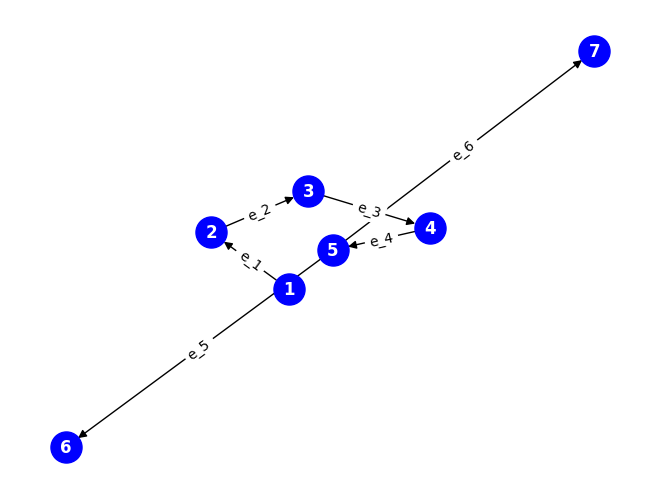

In [49]:
# draw the graph, with the nodes colored by their degree

# first, calculate the degree of each node
degree = G.degree()

# write the name of the node on the graph
pos = nx.spring_layout(G)

# then, draw the graph, with the nodes colored by their degreey
options = {
    'arrows' : True,
    'node_color': 'blue',
    'arrowstyle': '-|>',
    'arrowsize': 12,
    'with_labels': True,
    'font_weight': 'bold',
    'font_color': 'white',
    'font_size': 12,
    'node_size': 500,
}

nx.draw(G, pos, **options)

# draw the graph with labels
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['label'] for u, v in G.edges()})

# increasing the number of nodes in source and destination
for i in range(8,409):
    G.add_node(i)

for i in range(8,209):
    G.add_edge(i,2)

for i in range(209,409):
    G.add_edge(5,i)

for i, (u, v) in enumerate(G.edges()):
    G[u][v]['id'] = i + 1 
    G[u][v]['g_e'] = []
    
for i in range(8,209):
    G[i][2]['layer2'] = 'WiFiMCs5'
    G[i][2]['mode'] = 'STORE_AND_FORWARD'
    G[i][2]['throughput'] = 48 * 10**6 # 12Mbit/s -> 12*10^6 bit/s
    G[i][2]['a_e'] = 192 # 192 bit
    G[i][2]['tau_e'] = G[1][2]['a_e'] * 10**6/ G[1][2]['throughput']
    G[i][2]['d_e'] = 4 # 4us 

for i in range(209,409):
    G[5][i]['layer2'] = 'WiFiMCs5'
    G[5][i]['mode'] = 'STORE_AND_FORWARD'
    G[5][i]['throughput'] = 48 * 10**6 # 12Mbit/s -> 12*10^6 bit/s
    G[5][i]['a_e'] = 192 # 192 bit
    G[5][i]['tau_e'] = G[1][2]['a_e'] * 10**6/ G[1][2]['throughput']
    G[5][i]['d_e'] = 4 # 4us 

SF_duration = SF_duration * 10**3
for i, (u, v) in enumerate(G.edges()):
    G[u][v]['tau_e'] = G[u][v]['tau_e'] * 10**3
    G[u][v]['d_e'] = G[u][v]['d_e'] * 10**3

In [50]:
paths = dict(nx.shortest_path(G))
def grouped(iterable):
    return [(iterable[i], iterable[i+1]) for i in range(len(iterable)-1)]

def random_path(debug=False, src_list = UE_hops, dest_list = UE_hops):
    random_path = [] 
    start = random.choice(src_list)
    dest = random.choice(dest_list)
    while not paths[start][dest]:
        start = random.choice(src_list)
        dest = random.choice(dest_list)
    random_path   = paths[start][dest]
    random_path_e = []
    for u,v in grouped(random_path):
        if debug:
            print( f"Edge {u} -> {v}", G[u][v])
        random_path_e.append(G[u][v])
    return random_path_e

random_path(debug=True, src_list=[1], dest_list=[6])


Edge 1 -> 2 {'id': 1, 'g_e': [], 'layer2': 'WiFiMCs5', 'mode': 'STORE_AND_FORWARD', 'throughput': 48000000, 'a_e': 192, 'tau_e': 4000.0, 'd_e': 4000, 'label': 'e_1'}
Edge 2 -> 3 {'id': 2, 'g_e': [], 'layer2': 'Ethernet10Gb', 'throughput': 10000000000, 'a_e': 8, 'tau_e': 0.8, 'd_e': 100000, 'note': 'hop distance 65Km', 'label': 'e_2'}
Edge 3 -> 4 {'id': 3, 'g_e': [], 'layer2': 'Ethernet10Gb', 'throughput': 10000000000, 'a_e': 8, 'tau_e': 0.8, 'd_e': 100000, 'note': 'hop distance 10Km', 'label': 'e_3'}
Edge 4 -> 5 {'id': 4, 'g_e': [], 'layer2': 'Ethernet10Gb', 'throughput': 10000000000, 'a_e': 8, 'tau_e': 0.8, 'd_e': 100000, 'note': 'hop distance 65Km', 'label': 'e_4'}
Edge 5 -> 6 {'id': 5, 'g_e': [], 'layer2': 'WiFiMCs5', 'mode': 'STORE_AND_FORWARD', 'throughput': 48000000, 'a_e': 192, 'tau_e': 4000.0, 'd_e': 4000, 'label': 'e_5'}


[{'id': 1,
  'g_e': [],
  'layer2': 'WiFiMCs5',
  'mode': 'STORE_AND_FORWARD',
  'throughput': 48000000,
  'a_e': 192,
  'tau_e': 4000.0,
  'd_e': 4000,
  'label': 'e_1'},
 {'id': 2,
  'g_e': [],
  'layer2': 'Ethernet10Gb',
  'throughput': 10000000000,
  'a_e': 8,
  'tau_e': 0.8,
  'd_e': 100000,
  'note': 'hop distance 65Km',
  'label': 'e_2'},
 {'id': 3,
  'g_e': [],
  'layer2': 'Ethernet10Gb',
  'throughput': 10000000000,
  'a_e': 8,
  'tau_e': 0.8,
  'd_e': 100000,
  'note': 'hop distance 10Km',
  'label': 'e_3'},
 {'id': 4,
  'g_e': [],
  'layer2': 'Ethernet10Gb',
  'throughput': 10000000000,
  'a_e': 8,
  'tau_e': 0.8,
  'd_e': 100000,
  'note': 'hop distance 65Km',
  'label': 'e_4'},
 {'id': 5,
  'g_e': [],
  'layer2': 'WiFiMCs5',
  'mode': 'STORE_AND_FORWARD',
  'throughput': 48000000,
  'a_e': 192,
  'tau_e': 4000.0,
  'd_e': 4000,
  'label': 'e_5'}]

In [51]:
from math import ceil

def generate_flow(src_list,dest_list):
    path = [e["id"] for e in random_path(src_list=src_list, dest_list=dest_list)]
    
    application = random.choice(["App1", "App2"])
    if application == "App1":
        size = random.randint(80,120) * 8 
        return Application(application, period=10**6, delay=10**6, jitter=10**5, path=path, size=size)
    
    if application == "App2":
        size = random.randint(980,1020) * 8 
        return Application(application, period=10**7, delay=10**7, jitter=10**6, path=path, size=size)

# UE to Ue flow
generate_flow(src_list=[i for i in range(8,209)], dest_list=[i for i in range(209,409)]).__dict__   

{'period': 10000000,
 'delay': 10000000,
 'jitter': 1000000,
 'name': 'App2',
 'path': [371, 2, 3, 4, 64],
 'size': 7912}

In [52]:
with open("rquests_wifiToWifi.csv", "w") as f:
    with open("rquests_wifiToWifi.json", "w") as fbin:
        data = []
        
        for id in range(1,3001):
                flow = generate_flow(src_list=[i for i in range(8,209)], dest_list=[i for i in range(209,409)])
                f.write(f"{id},{flow.name},{flow.period},{flow.delay},{flow.jitter},{flow.path},{flow.size}\n")
                flow.id = id
                data.append(flow.__dict__)
        
        import json
        json.dump(data, fbin, indent=4)

In [53]:
with open("rquests_wifiToDC.csv", "w") as f:
    with open("rquests_wifiToDC.json", "w") as fbin:
        data = []

        for id in range(1,3001):
                flow = generate_flow(src_list=[i for i in range(8,209)], dest_list=[2,3,4,5])
                f.write(f"{id},{flow.name},{flow.period},{flow.delay},{flow.jitter},{flow.path},{flow.size}\n")
                flow.id = id
                data.append(flow.__dict__)

        import json
        json.dump(data, fbin, indent=4)

In [54]:
from enum import Enum
from bitarray import bitarray
import json

class Complexity(Enum):
    LOW = 1
    LOWMEDIUM = 2
    MEDIUM = 3
    MEDIUMHIGH = 4
    HIGH = 5

    def get_delta_complexity(self):
        return {
            Complexity.LOW: 0.15,
            Complexity.LOWMEDIUM: 0.15,
            Complexity.MEDIUM: 0.1,
            Complexity.MEDIUMHIGH: 0.1,
            Complexity.HIGH: 0.1
        }[self]

    def get_instance_name(self):
        return {
            Complexity.LOW: "low",
            Complexity.LOWMEDIUM: "lowmedium",
            Complexity.MEDIUM: "medium",
            Complexity.MEDIUMHIGH: "mediumhigh",
            Complexity.HIGH: "high"
        }[self]
    
for u, v in G.edges():
    G[u][v]['g_e'] = []
    G[u][v]['mode'] = 'STORE_AND_FORWARD'

for complexity in Complexity:
    instance_name = complexity.get_instance_name()
    delta = complexity.get_delta_complexity()
    for i, (u, v) in enumerate(G.edges()):
        t_e = int(SF_duration / G[u][v]['tau_e'])
        T_e = bitarray('1' * t_e)
        
        #step = 1
        removes = 0
        to_remove = ceil(delta * t_e)
        step = ceil(to_remove * complexity.get_delta_complexity())
        while removes < to_remove:

            # select a random time slot
            t = random.randint(1,t_e)
            while T_e[t-1] == False:
                t = random.randint(1,t_e)

            # remove the t
            for i in range(step):
                k = t + i
                if k >= t_e: k -= t_e
                T_e[k] = False
                removes += 1
        from bitarray.util import serialize
        with open(f"{instance_name}/{instance_name}_directed_link_{G[u][v]['id']}.bin", 'wb') as file:
            # writebyte 
            file.write(serialize(T_e))
    
with open(f"network_storeAndForward.json", 'w') as file:
        data = {
            "SF_duration" : SF_duration,
            "E" : [G[u][v]["id"] for (u, v) in G.edges()],
            "B_e" : [G[u][v]["throughput"] for i, (u, v) in enumerate(G.edges())],
            "a_e" : [G[u][v]["a_e"] for i, (u, v) in enumerate(G.edges())],
            "tau_e" : [G[u][v]["tau_e"] for i, (u, v) in enumerate(G.edges())],
            "g_e" : [G[u][v]["g_e"] for i, (u, v) in enumerate(G.edges())],
            "d_e" : [G[u][v]["d_e"] for i, (u, v) in enumerate(G.edges())],
            "mode" : [G[u][v]["mode"] if 'mode' in G[u][v] else "fast"  for i, (u, v) in enumerate(G.edges())],
        }
        json.dump(data, file)

In [55]:
for u, v in G.edges():
    G[u][v]['g_e'] = []
    G[u][v]['mode'] = 'FAST'

    
with open(f"network_fast.json", 'w') as file:
        data = {
            "SF_duration" : SF_duration,
            "E" : [G[u][v]["id"] for (u, v) in G.edges()],
            "B_e" : [G[u][v]["throughput"] for i, (u, v) in enumerate(G.edges())],
            "a_e" : [G[u][v]["a_e"] for i, (u, v) in enumerate(G.edges())],
            "tau_e" : [G[u][v]["tau_e"] for i, (u, v) in enumerate(G.edges())],
            "g_e" : [G[u][v]["g_e"] for i, (u, v) in enumerate(G.edges())],
            "d_e" : [G[u][v]["d_e"] for i, (u, v) in enumerate(G.edges())],
            "mode" : [G[u][v]["mode"] if 'mode' in G[u][v] else "fast"  for i, (u, v) in enumerate(G.edges())],
        }
        json.dump(data, file)
